In [1]:
from fastai import *
from fastai.vision import *
import os
print(os.getcwd())
path = os.getcwd() + '/datasets/' + 'dt_25x_split'
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train= path+'/train', test= path+'/test', valid_pct=0.2, size=224, resize_method=ResizeMethod.SQUISH, num_workers=6, bs=32).normalize()
# type(data)
# tfms = get_transforms() # or tfms=None if none are needed
# size=256 # size=(224,224) or (400,224)
# data = src.transform(size=size, resize_method=ResizeMethod.SQUISH).databunch(bs=64, num_workers=6).normalize()
type(data)

/home/adeebabbas/Desktop/radio/RML2016.10a


fastai.vision.data.ImageDataBunch

In [ ]:
print(data.valid_ds)
print("...")
print(data.train_ds)
print("...")
print(data.test_ds)

In [ ]:
bs = 64
data.train_ds[0]

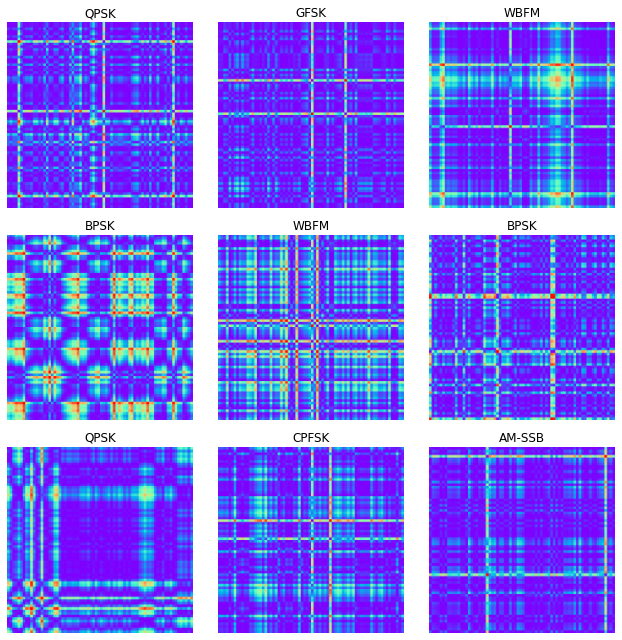

In [2]:
data.show_batch(rows=3, figsize=(9,9))

In [2]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)

In [ ]:
learn.model

In [4]:
import torch
print(torch.cuda.get_device_name(0))
torch.cuda.is_available()

GeForce RTX 2080 Ti


True

In [5]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.957702,1.862197,0.699659,41:23
1,1.838045,1.791390,0.683494,39:50
2,1.831836,1.750409,0.661136,39:47
3,1.788104,1.735647,0.663011,39:57
4,1.769057,1.720114,0.653437,39:53
5,1.699790,1.716132,0.642841,39:59
6,1.695321,1.686361,0.634773,40:13
7,1.624608,1.679728,0.631449,40:14
8,1.643390,1.691374,0.633494,39:17
9,1.613970,1.686126,0.632358,39:12


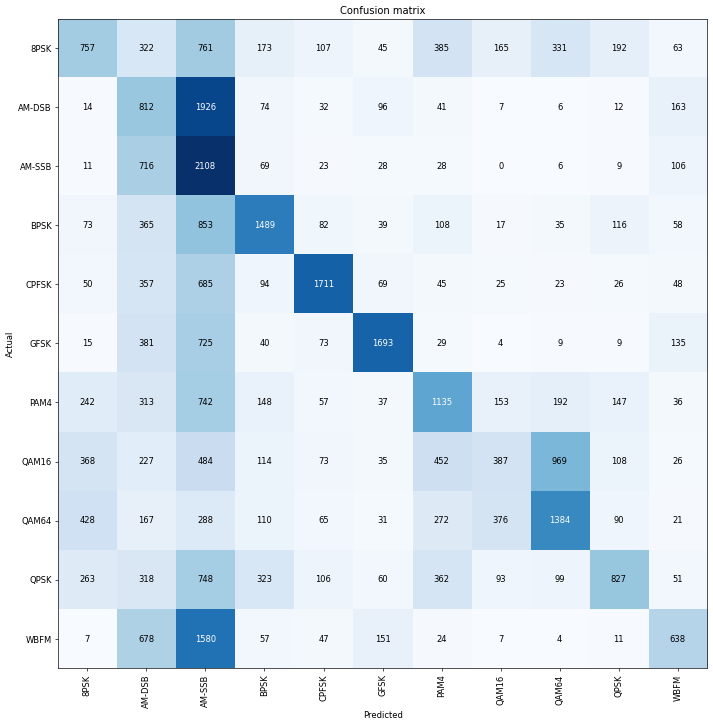

In [6]:
learn.save('stage-1')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


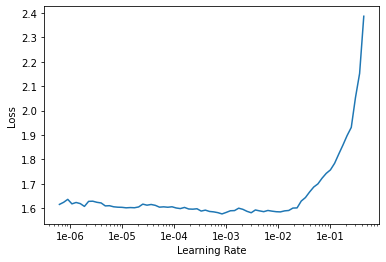

In [14]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,0.5e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.784203,1.709558,0.639034,40:36
1,1.629874,1.644786,0.615852,41:21


In [16]:
learn.save('stage-2')

In [3]:
learn.load('stage-2')


Learner(data=ImageDataBunch;

Train: LabelList (140800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
CPFSK,CPFSK,CPFSK,CPFSK,CPFSK
Path: /home/adeebabbas/Desktop/radio/RML2016.10a/datasets/dt_25x_split;

Valid: LabelList (35200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
GFSK,CPFSK,CPFSK,QPSK,BPSK
Path: /home/adeebabbas/Desktop/radio/RML2016.10a/datasets/dt_25x_split;

Test: LabelList (44000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/adeebabbas/Desktop/radio/RML2016.10a/datasets/dt_25x_split, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [4]:
learn.unfreeze()

In [5]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,0.5e-3))